<p style="text-align: center; font-size: 32px; font-weight: bold;">Normalized Stock Price Trends for Top 100 S&P 500 Companies</p>

This code loads and preprocesses data from a CSV file, cleaning and converting columns like 'Weight' and 'Price'. 

It then identifies the top 100 companies based on the average 'Weight', filters the data for these companies, and normalizes the 'Price' for each company, setting the first available price as the base (100).

In [19]:
import pandas as pd

# Load and preprocess data
df = pd.read_csv('output/s&p500_merged.csv', sep=';', dtype="str")
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df['Weight'] = df['Weight'].str.replace('%', '', regex=False).astype(float)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.sort_values(by=['Company', 'Date'])

# Get top 100 companies by average Weight
top_100_companies = (
    df.groupby('Company')['Weight']
    .mean()
    .sort_values(ascending=False)
    .head(100)
    .index
)

# Filter and copy to avoid SettingWithCopyWarning
df_top100 = df[df['Company'].isin(top_100_companies)].copy()

# Normalize price (base 100 at first available date per company)
df_top100['Normalized_Price'] = df_top100.groupby('Company')['Price'].transform(lambda x: x / x.iloc[0] * 100)

This code generates 10 subplots to visualize the normalized stock price trends of the top 100 S&P 500 companies. 

The companies are grouped into 10 sets of 10, with each subplot displaying the price trends for one group. 

The price is normalized to a base of 100 for comparison, with axes, titles, and legends properly formatted.

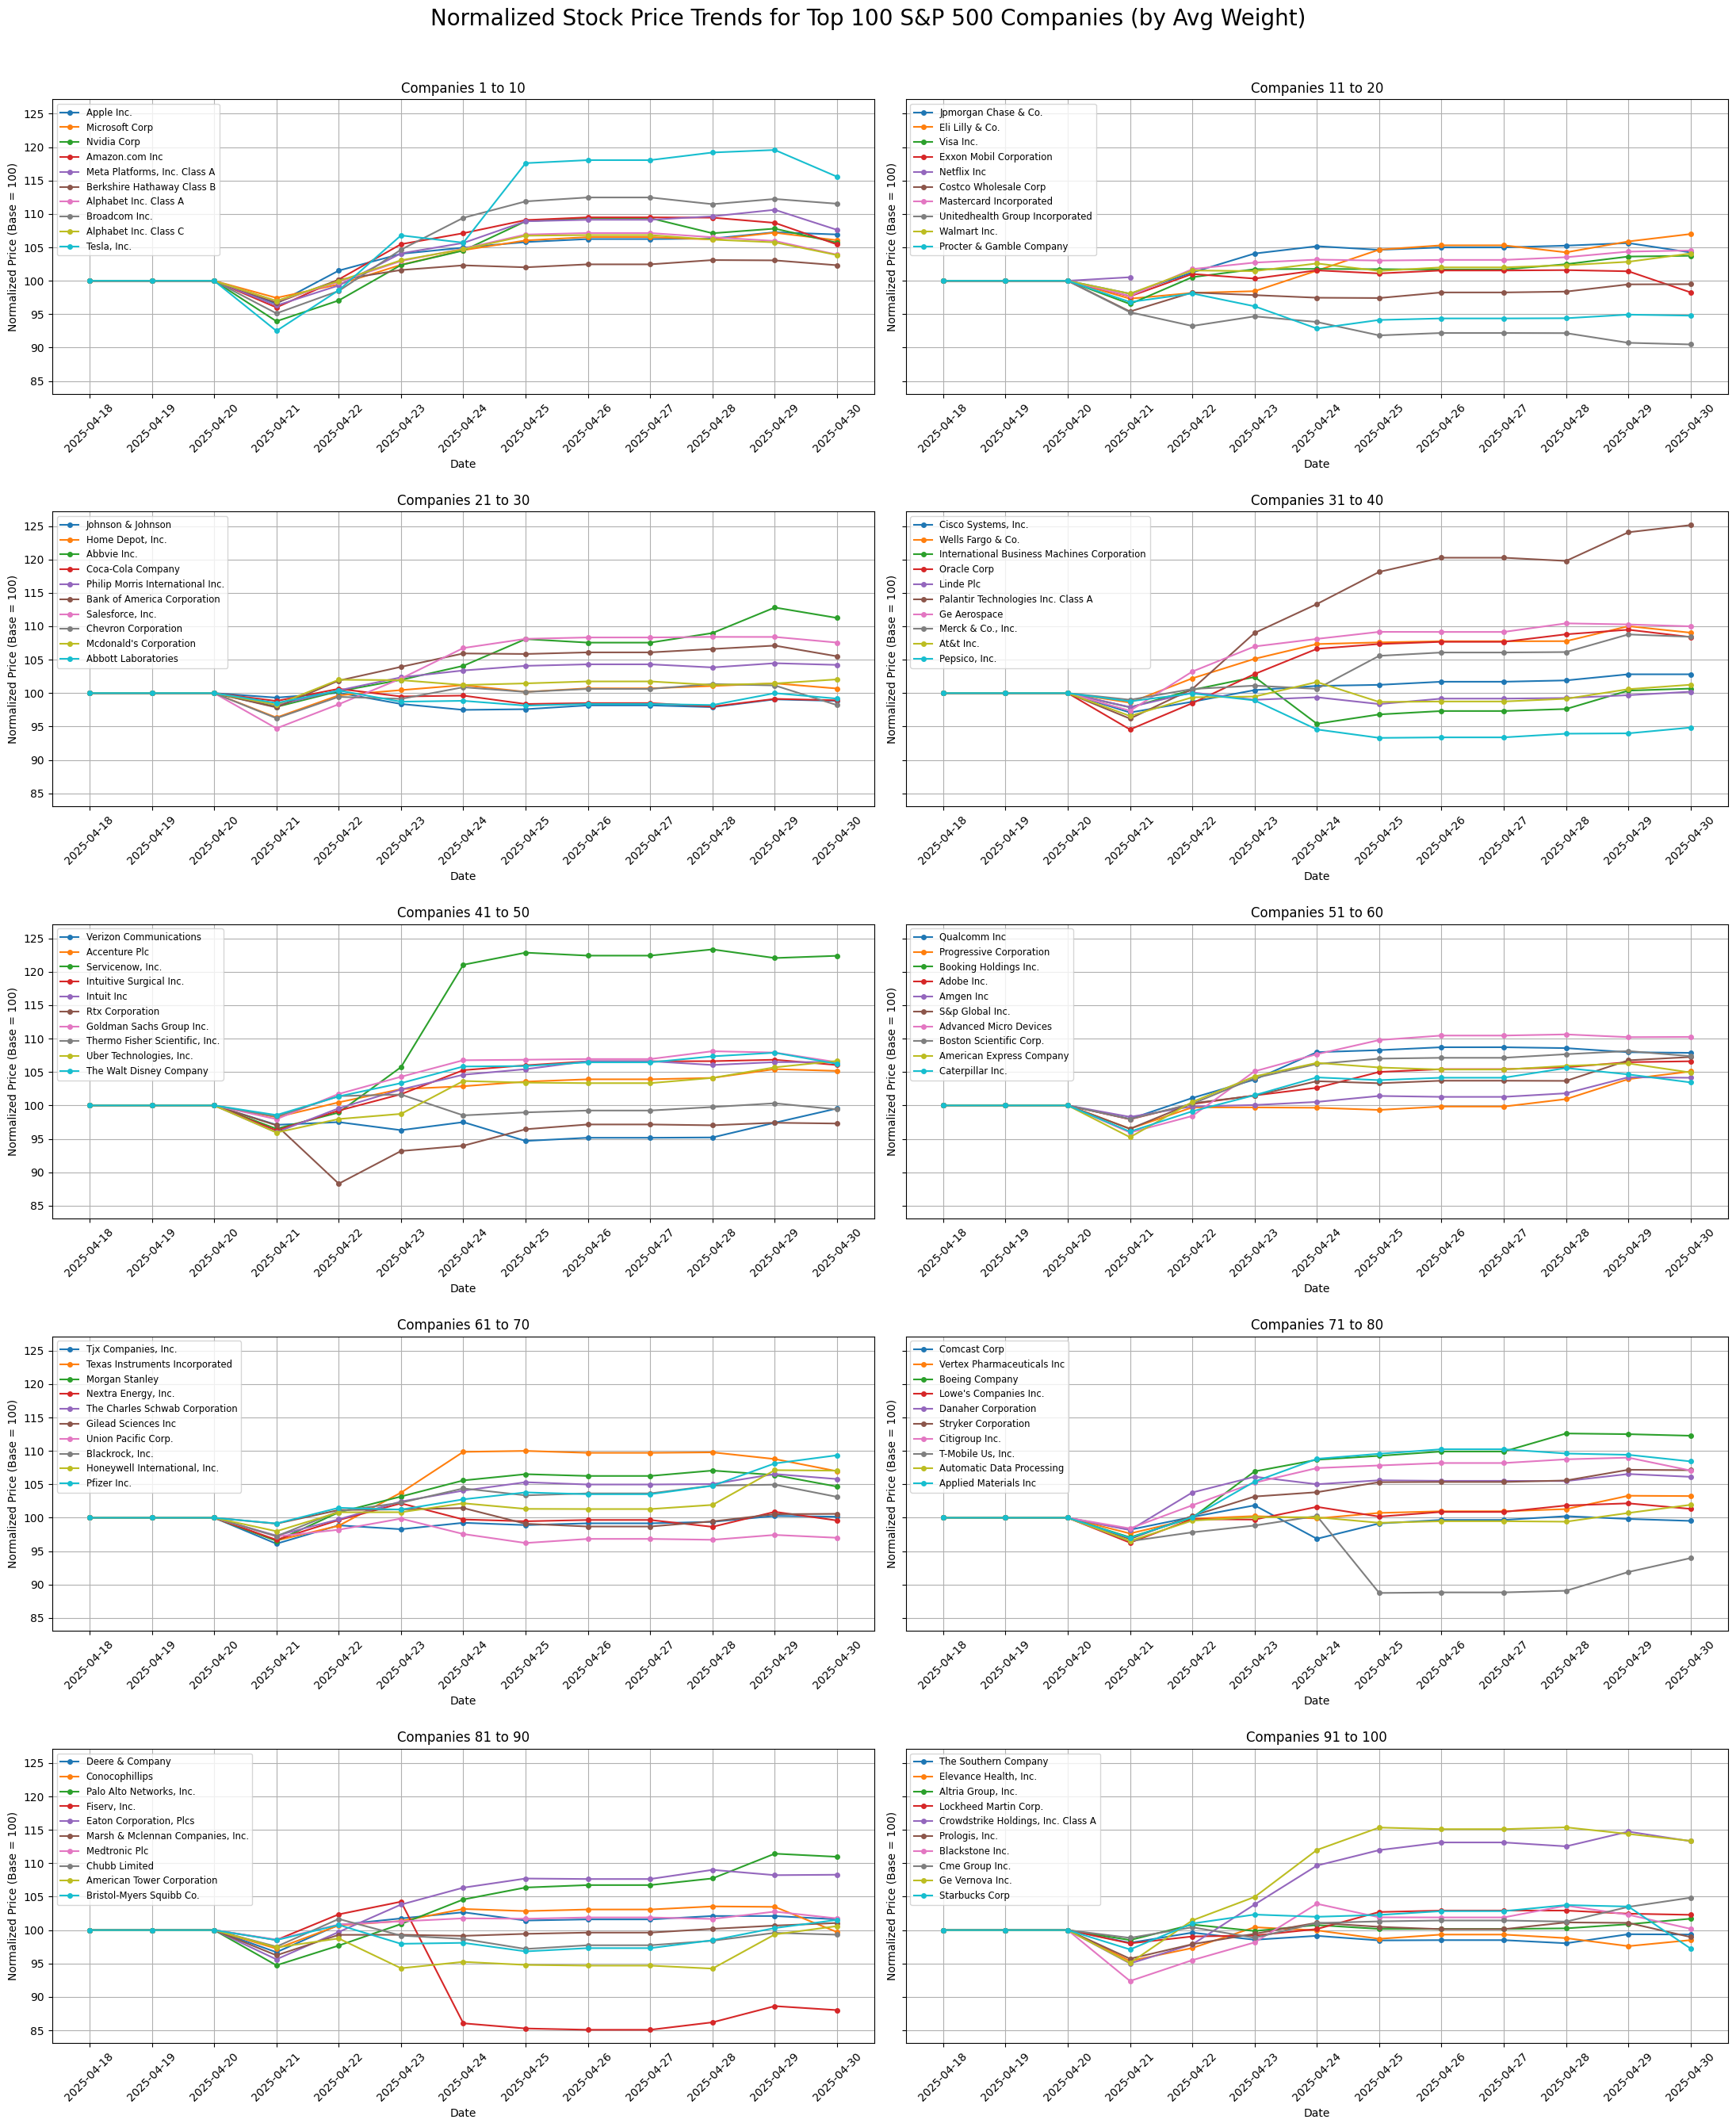

In [20]:
# Create 10 subplots (5 rows × 2 columns)
fig, axes = plt.subplots(5, 2, figsize=(22, 26), sharex=True, sharey=True)
axes = axes.flatten()

# Unique sorted dates for x-axis ticks
unique_dates = sorted(df_top100['Date'].unique())

# Split top 100 into chunks of 10
top_100_chunks = [top_100_companies[i:i + 10] for i in range(0, 100, 10)]

# Plot each group of 10 companies
for i, companies in enumerate(top_100_chunks):
    ax = axes[i]
    for company in companies:
        company_df = df_top100[df_top100['Company'] == company]
        ax.plot(
            company_df['Date'], company_df['Normalized_Price'],
            label=company, marker='o', markersize=4  # smaller marker
        )

    ax.set_title(f'Companies {i * 10 + 1} to {(i + 1) * 10}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Normalized Price (Base = 100)')
    ax.legend(fontsize='small', loc='upper left')
    ax.grid(True)
    ax.set_xticks(unique_dates)
    ax.tick_params(axis='x', rotation=45, labelbottom=True)

# Final layout
plt.tight_layout()
plt.suptitle('Normalized Stock Price Trends for Top 100 S&P 500 Companies (by Avg Weight)', fontsize=20, y=1.03)
plt.subplots_adjust(hspace=0.4)
plt.show()